In [20]:
import pandas as pd
import sys
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

from optional.data_processing import *


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


df_all_housing_info2 = pd.read_csv('data/eda.csv')

df_all_housing_info = df_all_housing_info2.query('3< grade')
# df_all_housing_info
# df_all_housing_info.groupby('grade').count()
df_all_housing_info2.groupby('grade').count()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
grade,,,,,,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,27,27,27,27,27,27,25,27,27,27,27,27,18,27,27,27,27,27,27,27
5,242,242,242,242,242,242,210,242,242,242,235,242,185,242,242,242,242,242,242,242
6,2038,2038,2038,2038,2038,2038,1809,2031,2038,2038,1996,2038,1677,2038,2038,2038,2038,2038,2038,2038
7,8974,8974,8974,8974,8974,8974,7965,8948,8974,8974,8791,8974,7363,8974,8974,8974,8974,8974,8974,8974
8,6065,6065,6065,6065,6065,6065,5405,6053,6065,6065,5933,6065,4986,6065,6065,6065,6065,6065,6065,6065
9,2615,2615,2615,2615,2615,2615,2321,2604,2615,2615,2557,2615,2176,2615,2615,2615,2615,2615,2615,2615
10,1134,1134,1134,1134,1134,1134,1018,1130,1134,1134,1112,1134,934,1134,1134,1134,1134,1134,1134,1134
11,399,399,399,399,399,399,357,397,399,399,391,399,326,399,399,399,399,399,399,399


<Axes: xlabel='grade', ylabel='condition'>

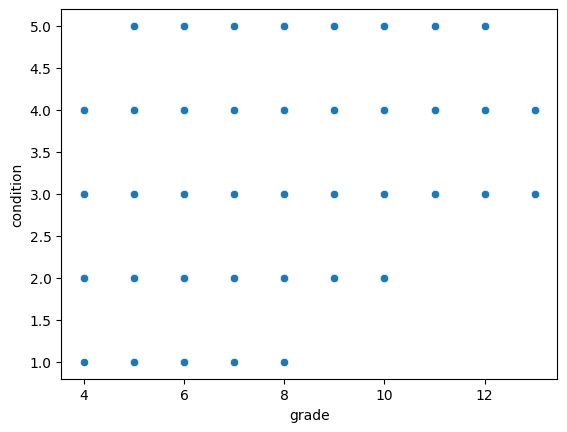

In [21]:
cond_plt =sns.scatterplot(x=df_all_housing_info.grade, y=df_all_housing_info.condition,)

cond_plt

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


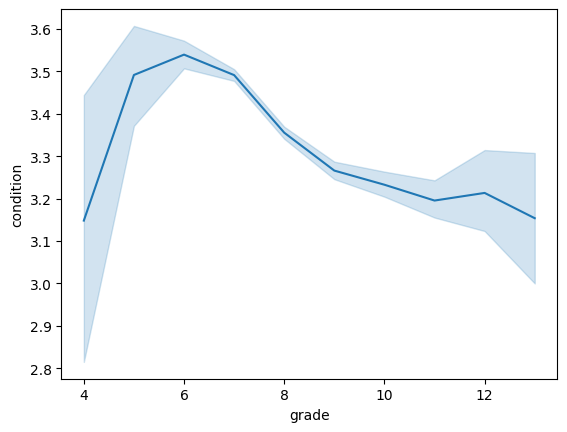

In [35]:
sns.lineplot(y=df_all_housing_info.condition, x=df_all_housing_info.grade)
plt.show()


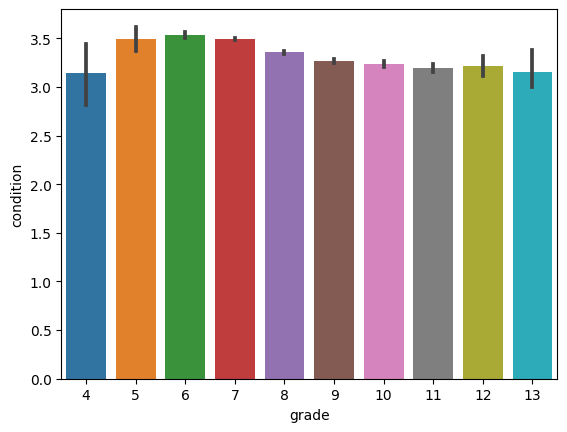

In [23]:
sns.barplot(y=df_all_housing_info.condition, x=df_all_housing_info.grade)
plt.show()


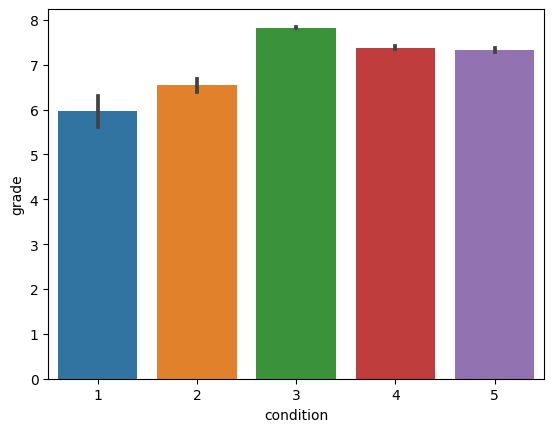

In [24]:
sns.barplot(y=df_all_housing_info.grade, x=df_all_housing_info.condition)
plt.show()


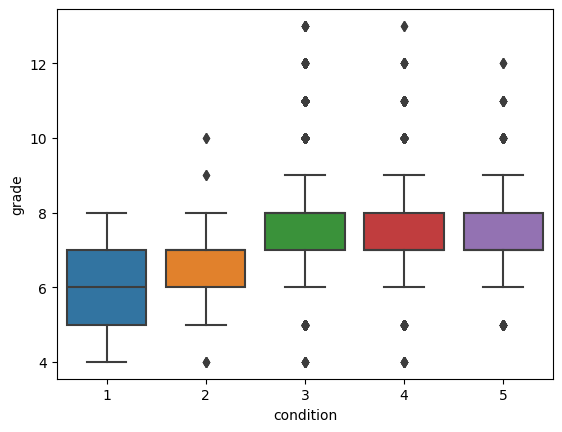

In [25]:
sns.boxplot(x=df_all_housing_info.condition, y=df_all_housing_info.grade)
plt.show()


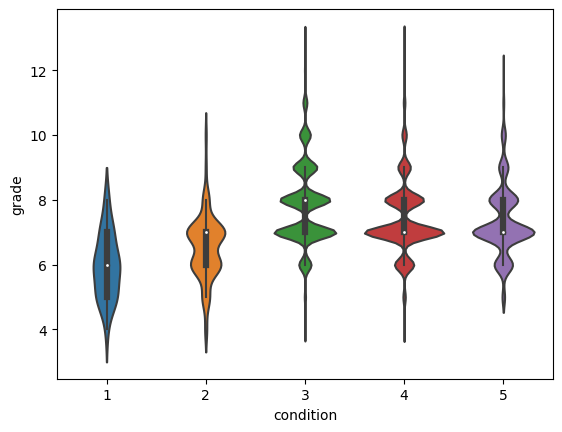

In [26]:
sns.violinplot(x=df_all_housing_info.condition, y=df_all_housing_info.grade)
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


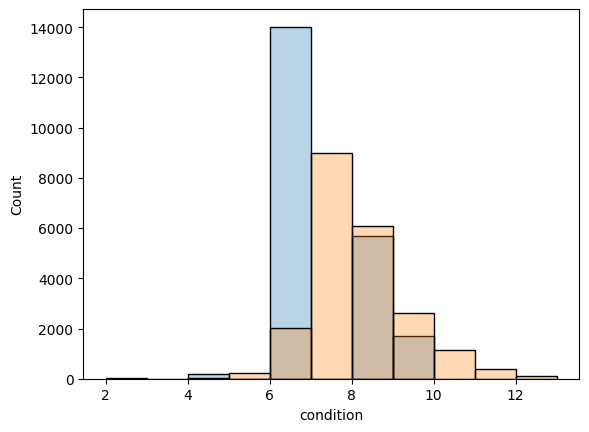

In [27]:
sns.histplot(df_all_housing_info.condition*2, alpha =0.3)


sns.histplot(df_all_housing_info.grade, alpha=0.3)
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'QuadContourSet' object has no attribute 'collections'

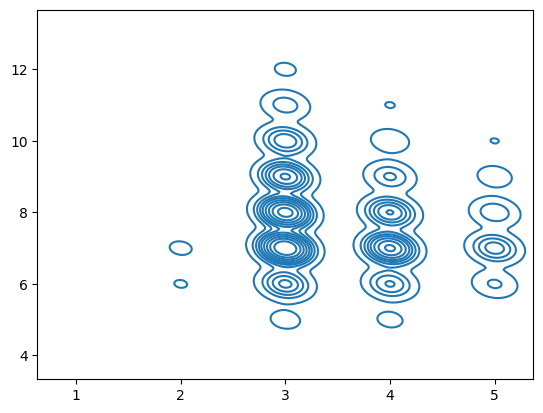

In [28]:
sns.kdeplot(x=df_all_housing_info.condition, y=df_all_housing_info.grade)
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


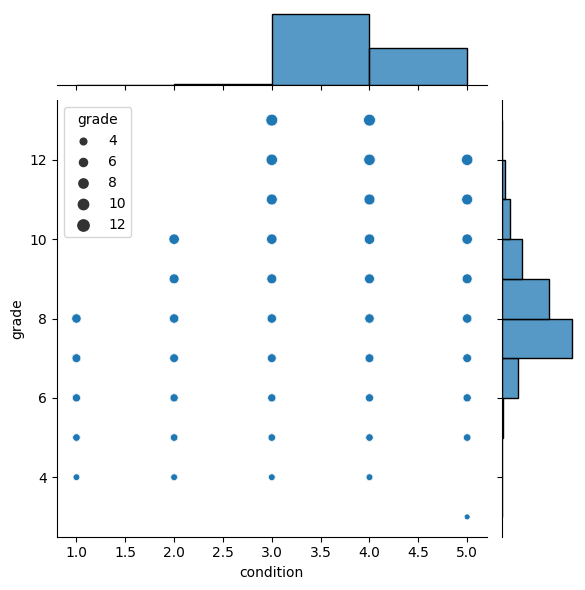

In [ ]:
sns.jointplot(x=df_all_housing_info.condition, y=df_all_housing_info.grade, size=df_all_housing_info.grade)
plt.show()


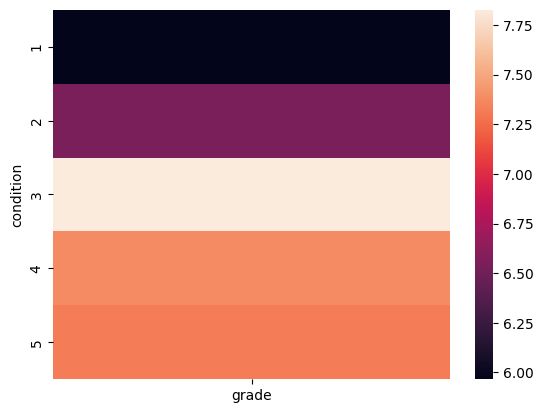

In [ ]:
# Beispiel-Daten für eine Heatmap vorbereiten (wenn nötig)
heatmap_data = df_all_housing_info.pivot_table(values='grade', index='condition', aggfunc='mean')

sns.heatmap(heatmap_data)
plt.show()


In [ ]:
correlation = df_all_housing_info[['condition', 'grade']].corr()
print(correlation)

corr2 = 


           condition     grade
condition   1.000000 -0.146896
grade      -0.146896  1.000000


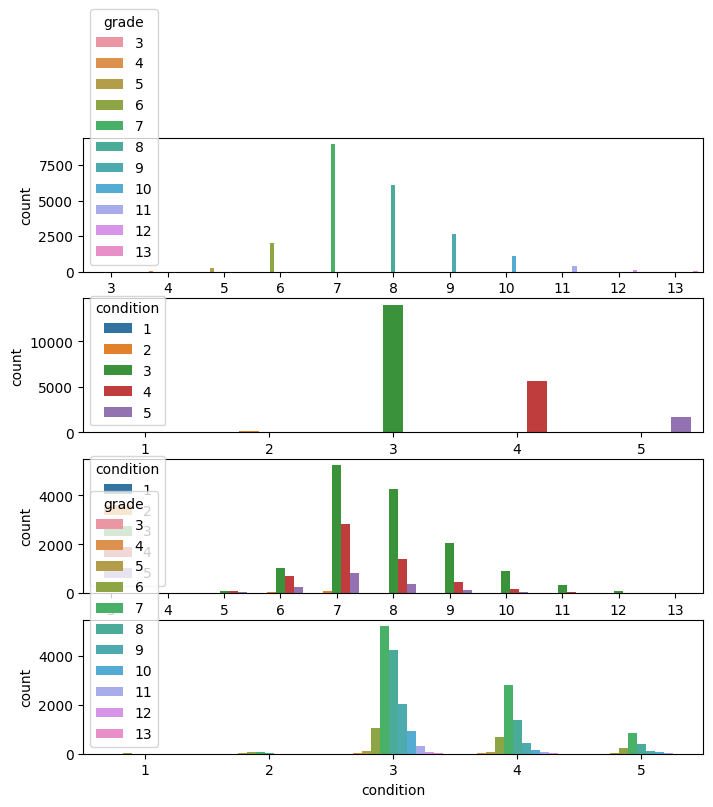

In [ ]:
fig, axes = plt.subplots(4,1, figsize=(8,8))

sns.countplot(x=df_all_housing_info.grade, hue=df_all_housing_info.grade, ax=axes[0])
sns.countplot(x=df_all_housing_info.condition, hue=df_all_housing_info.condition, ax=axes[1])
sns.countplot(x=df_all_housing_info.grade, hue=df_all_housing_info.condition, ax=axes[2])
sns.countplot(x=df_all_housing_info.condition, hue=df_all_housing_info.grade, ax=axes[3])

plt.tight_layout
plt.show()

In [ ]:
df_all_housing_info[df_all_housing_info.grade >6].shape

(19289, 21)

In [ ]:
cgrade=df_all_housing_info.groupby('grade')['grade'].count()
ccond=df_all_housing_info.condition.value_counts().sort_index()
#df_all_housing_info.grade.value_counts().sort_index()

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


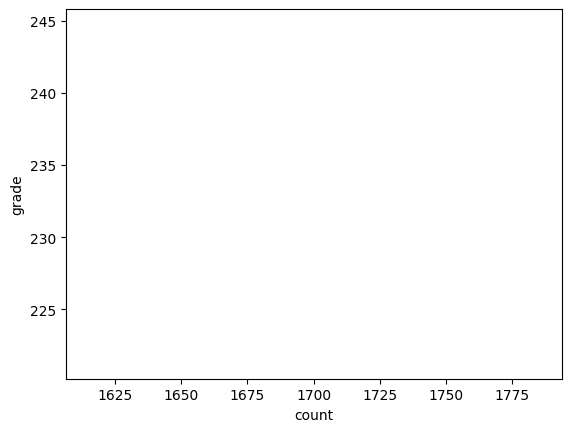

In [ ]:
sns.lineplot(y=cgrade, x=ccond)
plt.show()

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mahae

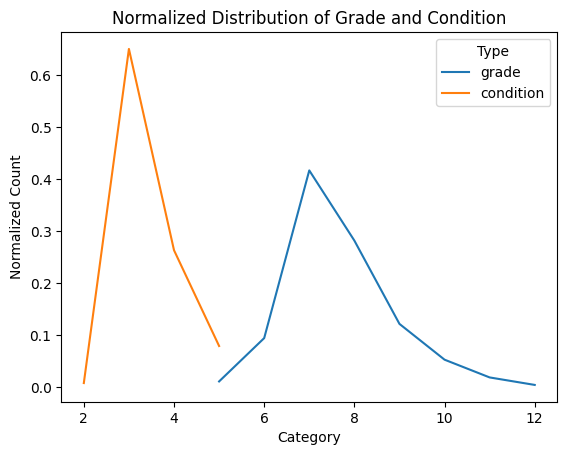

In [ ]:

# Häufigkeiten berechnen
grade_counts = df_all_housing_info['grade'].value_counts().sort_index()
condition_counts = df_all_housing_info['condition'].value_counts().sort_index()

# Normalisieren der Häufigkeiten (zwischen 0 und 1)
grade_counts_normalized = grade_counts / grade_counts.sum()
condition_counts_normalized = condition_counts / condition_counts.sum()

# DataFrame erstellen für die Visualisierung
normalized_df = pd.DataFrame({
    'grade': grade_counts_normalized,
    'condition': condition_counts_normalized
}).reset_index().melt(var_name='Type', value_name='Normalized Count', id_vars='index')



sns.lineplot(data=normalized_df, x='index', y='Normalized Count', hue='Type')

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Category')
plt.ylabel('Normalized Count')
plt.title('Normalized Distribution of Grade and Condition')
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mahae

<Axes: xlabel='condition', ylabel='grade'>

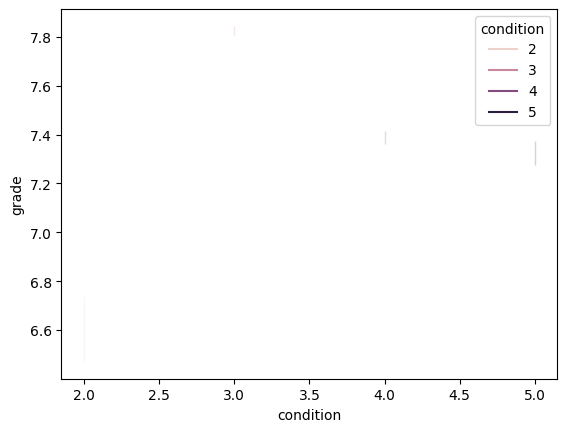

In [ ]:
sns.lineplot(data=df_all_housing_info, x='condition', y='grade', hue='condition')




In [30]:

# def calculate_avg_other_grades(row, df):
#     condition = row['condition']
#     grade = row['grade']
    
#     # Daten filtern: Alle anderen grades außer dem aktuellen
#     other_grades = df[(df['condition'] == condition) & (df['grade'] != grade)]
    
#     # Durchschnitt berechnen
#     avg_count = other_grades['count'].mean()
#     return avg_count

# Neue Spalte hinzufügen mit dem Durchschnitt der Counts für alle anderen Grades
#counts['avg_count_other_grades'] = counts.apply(calculate_avg_other_grades, df=counts, axis=1)

counts = df_all_housing_info.groupby(['grade', 'condition']).size().reset_index(name='count')

total_counts_per_grade = counts.groupby('grade')['count'].sum()

# Zielwert für Normalisierung: Durchschnitt der Gesamtsummen
target_total_count = total_counts_per_grade.mean()
counts['normalized_count'] = counts.apply(
    lambda row: row['count'] * (target_total_count / total_counts_per_grade[row['grade']]),
    axis=1
)


counts
#total_counts_per_grade
#target_total_count

,grade,condition,count,normalized_count
0,4,1,1,79.985185
1,4,2,4,319.940741
2,4,3,12,959.822222
3,4,4,10,799.851852
4,5,1,9,80.315702
5,5,2,15,133.859504
6,5,3,100,892.396694
7,5,4,84,749.613223
8,5,5,34,303.414876
9,6,1,11,11.656330


<Axes: xlabel='grade', ylabel='count'>

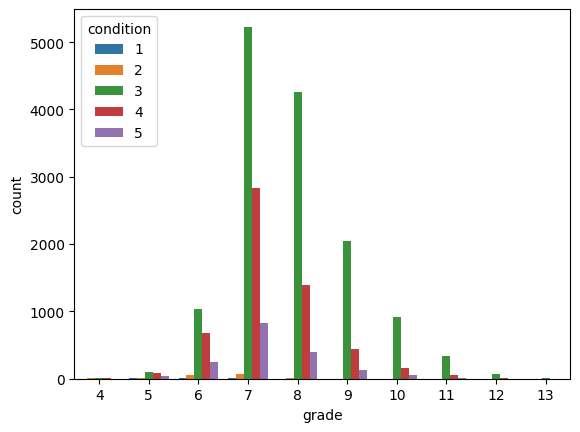

In [31]:
sns.barplot(data=counts, x='grade', y='count', hue='condition')


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


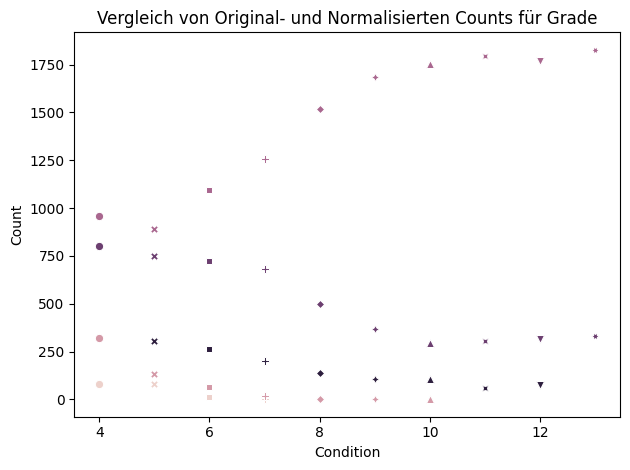

In [32]:
#sns.lineplot(data=counts, x='condition', y='count', hue='grade', style='grade', markers=True, legend=False)
sns.lineplot(data=counts, x='grade', y='normalized_count', hue='condition', style='grade', markers=True, legend=False)

# Achsentitel und Diagrammtitel
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Vergleich von Original- und Normalisierten Counts für Grade')
#plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mahae

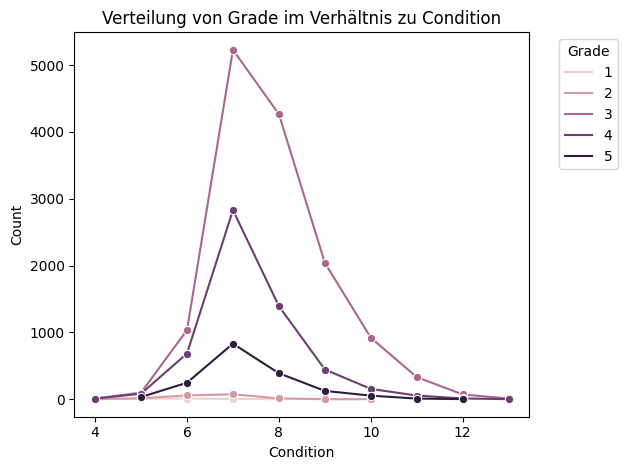

In [33]:
#counts = df_all_housing_info.groupby(['grade', 'condition']).size().reset_index(name='count')
# Lineplot erstellen
sns.lineplot(data=counts, x='grade', y='count', hue='condition', marker='o')

# Achsentitel und Diagrammtitel
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Verteilung von Grade im Verhältnis zu Condition')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mahae

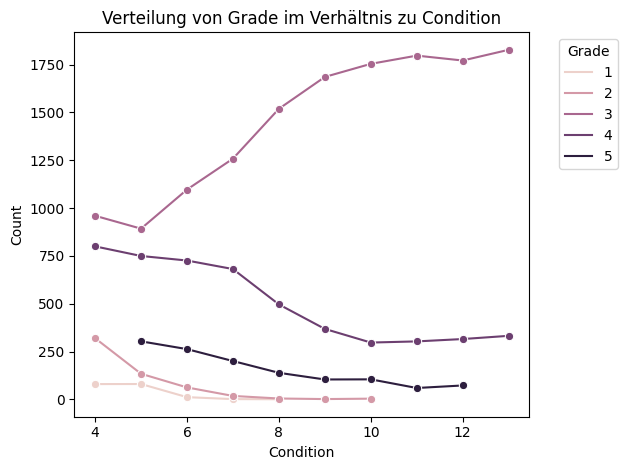

In [34]:
#counts = df_all_housing_info.groupby(['grade', 'condition']).size().reset_index(name='count')
# Lineplot erstellen
sns.lineplot(data=counts, x='grade', y='normalized_count', hue='condition', marker='o')

# Achsentitel und Diagrammtitel
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Verteilung von Grade im Verhältnis zu Condition')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
